In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Readin the metadata ffrom th csv file
df = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv')
df.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [3]:
# Printing the Metadata details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [4]:
df.shape

(110, 18)

In [5]:
import glob 
data_map = []
for directory in glob.glob("../input/lgg-mri-segmentation/kaggle_3m/*"):
# directory here will return the 110 folders we are navigating 
# For example : Directory :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307
    try:
        dir_name = directory.split("/")[-1]
        # dir_name extracts the folder name from the directory. For the above example would return TCGA_DU_7010_19860307
        # print("Directory : ", directory , " Dir_name : ", dir_name)
        # For every file in the directory(we have 110 directories) we form the "absolute file path"
        # for the actual RGB image and the mask image.
        # Example for filename : CGA_DU_7010_19860307_56_mask.tif  and TCGA_DU_7010_19860307_56.tif
        # image path with be concatenation of directory and filename
        # Example :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif 
        # Example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif
        for filename in os.listdir(directory):
            image_path = directory + '/' + filename
            # data_map is one-to-one mapping of Directory name and the absolute file path of an RGB or mask file 
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/data.csv'


In [6]:
data_map[:5]

['TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif',
 'TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif',
 'TCGA_DU_7010_19860307']

In [7]:
new_df = pd.DataFrame({"patient_id" : data_map[::2],
                   "path" : data_map[1::2]})
new_df.head()

,patient_id,path
0,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...


In [8]:
# Printing the first 10 patient ID's and its file path
for i in range(10):
    print("Patinet Id : ", new_df.iloc[i]['patient_id'])
    print("Absolute File path : ", new_df.iloc[i]['path'])
    print("="*200)

Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_27.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_52.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCG

In [9]:
# More about str.contains in a Pandas Series can be found here : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
normal_images = new_df[~new_df['path'].str.contains("mask")]
mask_images = new_df[new_df['path'].str.contains("mask")]

In [10]:
# Sorting the Images and mask so as to form one-to-one correspondence
common_file_length = 84
# Any file with its absolute file path has minimum characters in the file name
# For example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_   has 84 characters

normal_img_file_length = 4
# Normal file has only .tif common at its end, hence the value(len(.tif)) equal to 4

mask_img_file_length = 9
# mask files has _mask.tif at their end making its length(len(_mask.tif)) equal to 9

# Data sorting
imgs = sorted(normal_images["path"].values, key=lambda x : int(x[common_file_length:-normal_img_file_length]))
masks = sorted(mask_images["path"].values, key=lambda x :  int(x[common_file_length:-mask_img_file_length]))

# x[common_file_length:-normal_img_file_length] is picking up the number stored after "TCGA_DU_7010_19860307_" and before ".tif" from a given Image x
# Same is happening w.r.t Mask Image

# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx])
print("\nPath to the Mask:", masks[idx])

Path to the Image: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_FG_7643_20021104/TCGA_FG_7643_20021104_17.tif

Path to the Mask: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_FG_7643_20021104/TCGA_FG_7643_20021104_17_mask.tif


In [11]:
# Now we need to create a DataFrame contains 4 columns
# 1. Patient ID
# 2. An RGB Image
# 3. It;s corresponding Mask Image
# 4. Mask Binary value : 0 and 1 depending on the image of the mask

import cv2

# Final dataframe
final_df = pd.DataFrame({"patient_id": normal_images.patient_id.values,
                         "image_path": imgs,
                         "mask_path": masks
                        })

# Creating the 3rd column for our final df where if the entire mask image is black(0 i.e no tumor) then its value will be 0 else 1
# def pos_neg_diagnosis(mask_path):
#     value = np.max(cv2.imread(mask_path)) # Checking for the maximum pixel value in the mask image
#     if value > 0 :  # Non zero value then tumor is present in the mask image
#         return 1
#     else:           # Zero value means no tumor
#         return 0
    
# final_df['mask'] = final_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
# final_df

In [12]:
# final_df_mask = final_df[final_df['mask'] == 1]
# final_df_mask.shape

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(final_df,test_size = 0.2)
X_val,X_test = train_test_split(X_val,test_size = 0.5)
print("X_train Shape : ", X_train.shape)
print("X_val Shape : ", X_val.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (3143, 3)
X_val Shape :  (393, 3)
X_test Shape :  (393, 3)


In [14]:
from skimage import io
import cv2
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.utils.data_utils import Sequence

In [15]:
def train_generator(data_frame,batch_size,aug_dict,
                   image_color_mode = "rgb",
                   mask_color_mode = "grayscale",
                   image_save_prefix = "image_path",
                   mask_save_prefix = "mask_path",
                   save_to_dir = None,
                   target_size = (256,256),
                   seed = 1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    
    image_datagenerator = image_datagen.flow_from_dataframe(
         data_frame,
         x_col = "image_path",
         class_mode = None,
         color_mode = image_color_mode,
         target_size = target_size,
         batch_size = batch_size,
         save_to_dir = save_to_dir,
         save_prefix = image_save_prefix,
         seed = seed)
    
    mask_datagenerator = mask_datagen.flow_from_dataframe(
         data_frame,
         x_col = "mask_path",
         class_mode = None,
         color_mode = mask_color_mode,
         target_size = target_size,
         batch_size = batch_size,
         save_to_dir = save_to_dir,
         save_prefix = mask_save_prefix,
         seed = seed)
    
    train_gen = zip(image_datagenerator,mask_datagenerator)
    
    for (img,mask) in train_gen:
        img,mask = adjust_data(img,mask)
        yield (img,mask)


def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

In [16]:
def conv_block(input_tensor,filter_size,kernel_size = 3,batchnorm = True):
    
    # First layers of Convolution
    X = Conv2D(filters = filter_size,kernel_size = (kernel_size,kernel_size),\
              kernel_initializer = "he_normal", padding = "same")(input_tensor)
    
    if batchnorm:
        X = BatchNormalization()(X)
    
    X = Activation("relu")(X)
    
    # Second layers of Convolution
    X = Conv2D(filters = filter_size,kernel_size = (kernel_size,kernel_size),\
              kernel_initializer = "he_normal", padding = "same")(X)
    
    if batchnorm:
        X = BatchNormalization()(X)
    
    X = Activation("relu")(X)
    
    return X

In [17]:
def UNet(input_image, filter_size = 16, dropout = 0.1, batchnorm = True):
    
    # Encoder/Contracting Path of the Unet
    c1 = conv_block(input_image,filter_size * 1,kernel_size = 3,batchnorm = batchnorm)
    p1 = MaxPooling2D((2,2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv_block(p1,filter_size * 2,kernel_size = 3,batchnorm = batchnorm)
    p2 = MaxPooling2D((2,2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv_block(p2,filter_size * 4,kernel_size = 3,batchnorm = batchnorm)
    p3 = MaxPooling2D((2,2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv_block(p3,filter_size * 8,kernel_size = 3,batchnorm = batchnorm)
    p4 = MaxPooling2D((2,2))(c4)
    p4 = Dropout(dropout)(p4)
    
    
    c5 = conv_block(p4,filter_size * 16,kernel_size = 3,batchnorm = batchnorm)
    
    # Decoder/Expanding Path of the Unet
    
    u6 = Conv2DTranspose(filter_size * 8,(2,2),strides = (2,2), padding = "same")(c5)
    u6 = concatenate([u6,c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv_block(u6,filter_size * 8,kernel_size = 3,batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(filter_size * 4,(2,2),strides = (2,2), padding = "same")(c6)
    u7 = concatenate([u7,c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv_block(u7,filter_size * 4,kernel_size = 3,batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(filter_size * 2,(2,2),strides = (2,2), padding = "same")(c7)
    u8 = concatenate([u8,c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv_block(u8,filter_size * 2,kernel_size = 3,batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(filter_size * 1,(2,2),strides = (2,2), padding = "same")(c8)
    u9 = concatenate([u9,c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv_block(u9,filter_size * 1,kernel_size = 3,batchnorm = batchnorm)
    
    
    outputs = Conv2D(1,(1,1) , activation = "sigmoid")(c9)
    model = Model(inputs = [input_image], outputs = outputs)
    return model
    

In [18]:
input_img = Input((256, 256, 3), name='img')
model = UNet(input_img, filter_size=16, dropout=0.2, batchnorm=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [19]:
# loss function and metrics
# Reference : https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2
#             https://www.kaggle.com/masoumehavahedi/brain-mri-attention-segmentation?scriptVersionId=68934190&cellId=21
def dice_coef(y_pred, Y, smooth = 100):
    y_flatten = K.flatten(Y)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_flatten * y_pred_flatten)
    union = K.sum(y_flatten) + K.sum(y_pred_flatten)
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

def jacard_coef(y_pred, Y,smooth = 100):
    y_flatten = K.flatten(Y)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_flatten * y_pred_flatten)
    union = K.sum(y_flatten) + K.sum(y_pred_flatten)
    jacard = (intersection + smooth) / (union - intersection + smooth)
    return jacard

def jacard_coef_loss(y_pred, Y):
    return -jacard_coef(y_pred, Y)


def dice_coef_loss(y_pred, Y):
    return -dice_coef(y_pred, Y)

In [20]:
# Adding Callbacks and compiling the model

# EPOCHS = 10
BATCH_SIZE = 32
learning_rate = 1e-4

train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = train_generator(X_train,BATCH_SIZE,
                           train_generator_args,
                           target_size = (256,256))

validation_gen = train_generator(X_val,BATCH_SIZE,
                           dict(),
                           target_size = (256,256))

optimizer = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer = "adam", loss = dice_coef_loss, metrics = ["binary_accuracy", jacard_coef, dice_coef])
# model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="UNet-segModel-weights.hdf5",verbose=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001,factor=0.1)

In [21]:
tf.keras.backend.clear_session()
history = model.fit(train_gen, steps_per_epoch=len(X_train) / BATCH_SIZE, epochs = 10, validation_data = validation_gen,
                    validation_steps=len(X_val) / BATCH_SIZE,
                    callbacks = [earlystopping,checkpointer,reduce_lr])

Found 3143 validated image filenames.
Found 3143 validated image filenames.
Epoch 1/10
99/98 [==============================] - ETA: 0s - loss: -0.0497 - binary_accuracy: 0.7570 - jacard_coef: 0.0257 - dice_coef: 0.0497Found 393 validated image filenames.
Found 393 validated image filenames.
98/98 [==============================] - 108s 1s/step - loss: -0.0498 - binary_accuracy: 0.7579 - jacard_coef: 0.0257 - dice_coef: 0.0498 - val_loss: -0.0481 - val_binary_accuracy: 0.8407 - val_jacard_coef: 0.0235 - val_dice_coef: 0.0455

Epoch 00001: val_loss improved from inf to -0.04813, saving model to UNet-segModel-weights.hdf5
Epoch 2/10
98/98 [==============================] - 70s 721ms/step - loss: -0.1106 - binary_accuracy: 0.9690 - jacard_coef: 0.0592 - dice_coef: 0.1106 - val_loss: -0.0299 - val_binary_accuracy: 0.4682 - val_jacard_coef: 0.0162 - val_dice_coef: 0.0317

Epoch 00002: val_loss did not improve from -0.04813
Epoch 3/10
98/98 [==============================] - 70s 721ms/step -

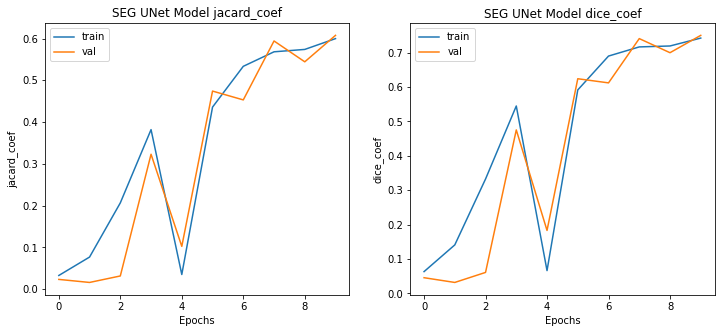

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['jacard_coef']);
plt.plot(history.history['val_jacard_coef']);
plt.title("SEG UNet Model jacard_coef");
plt.ylabel("jacard_coef");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(history.history['dice_coef']);
plt.plot(history.history['val_dice_coef']);
plt.title("SEG UNet Model dice_coef");
plt.ylabel("dice_coef");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

In [25]:
test_gen = train_generator(X_test,BATCH_SIZE,
                           dict(),
                           target_size = (256,256))
results = model.evaluate(test_gen,steps = len(X_test) / BATCH_SIZE)

Found 393 validated image filenames.
Found 393 validated image filenames.
12/12 [==============================] - 2s 130ms/step - loss: -0.7236 - binary_accuracy: 0.9948 - jacard_coef: 0.5709 - dice_coef: 0.7219


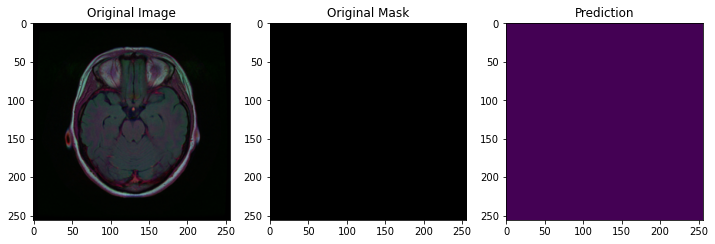

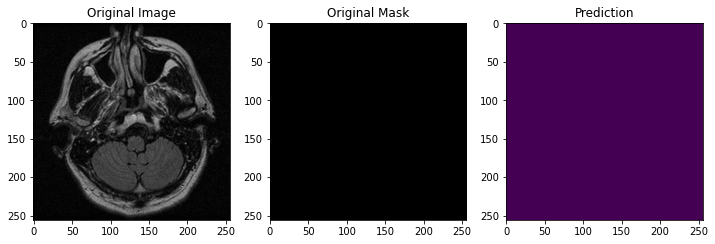

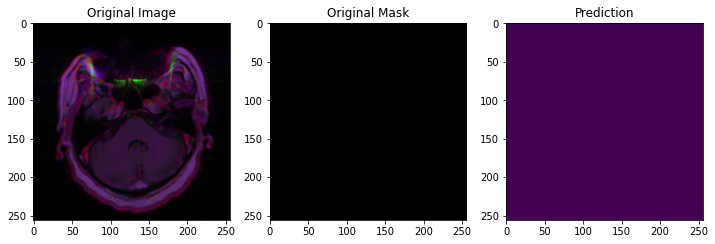

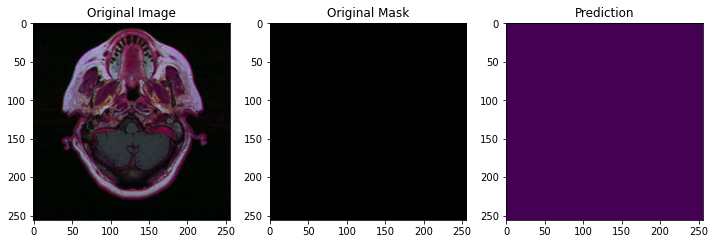

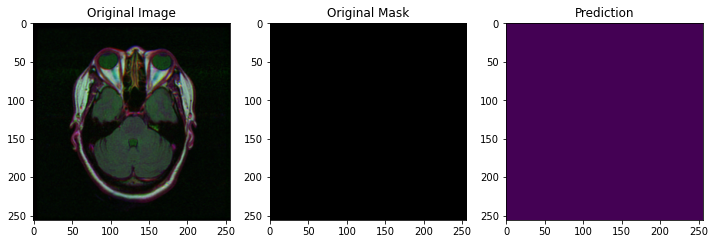

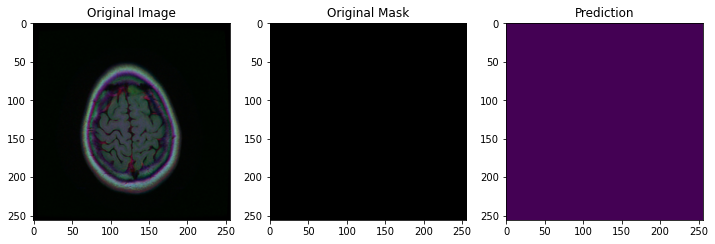

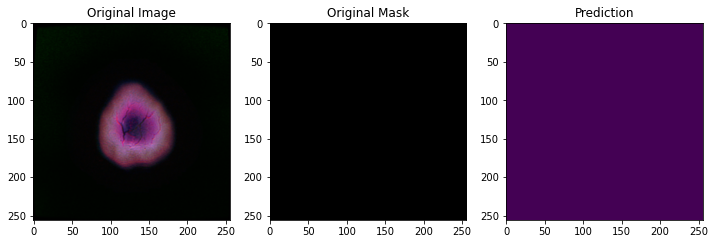

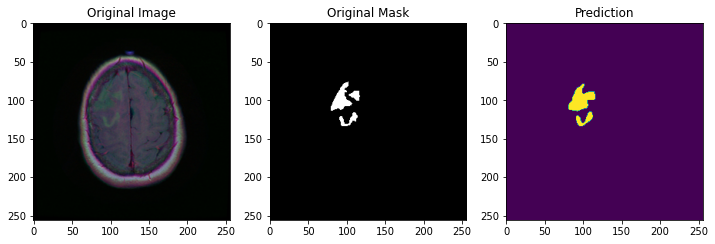

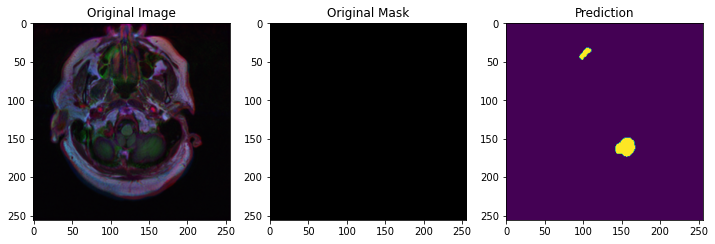

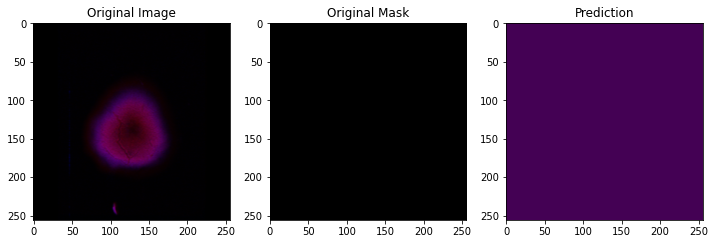

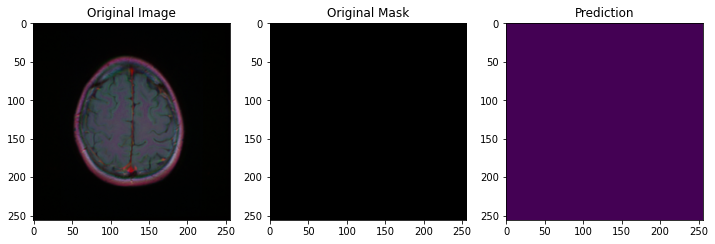

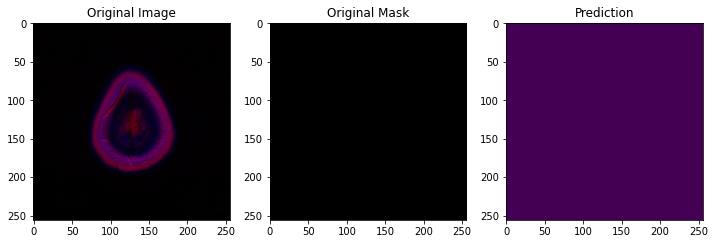

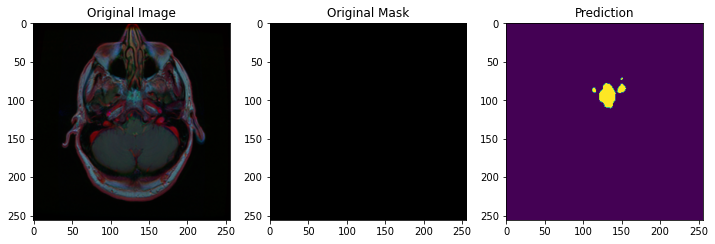

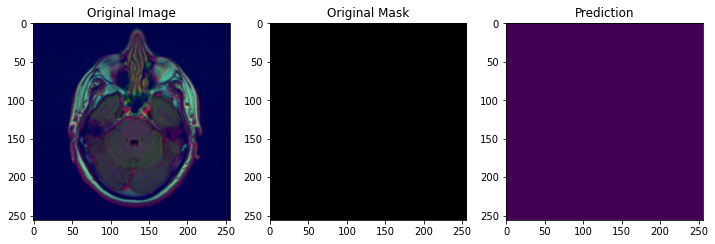

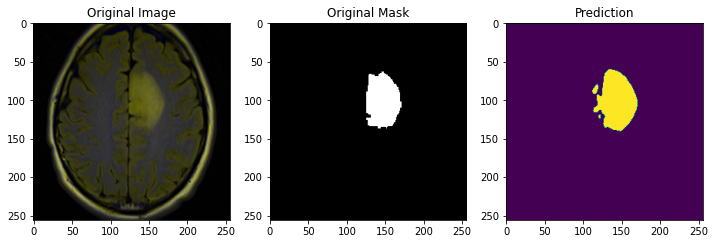

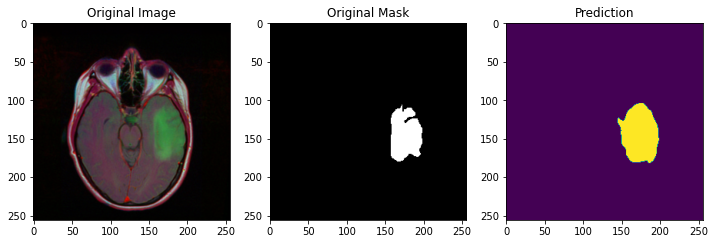

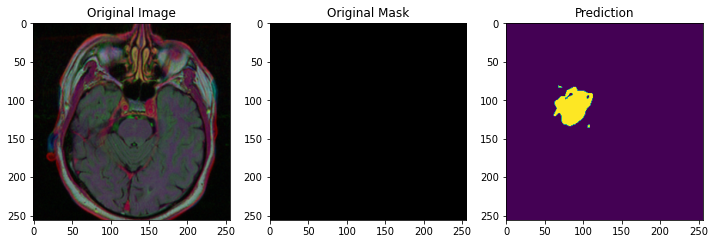

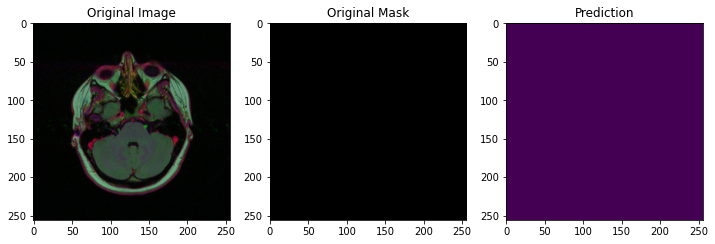

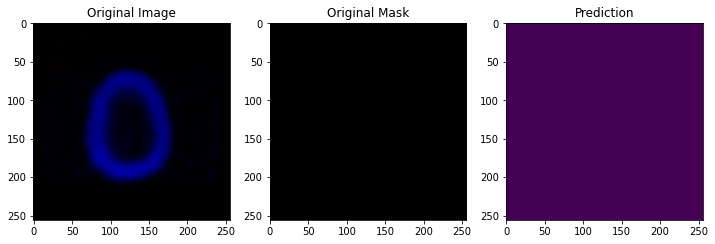

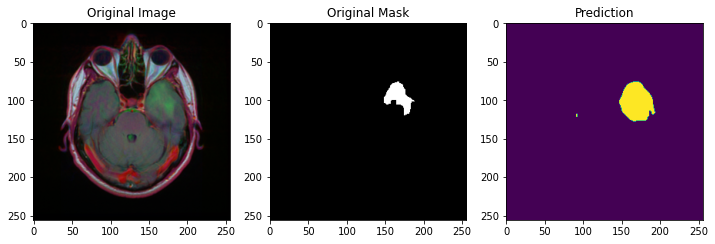

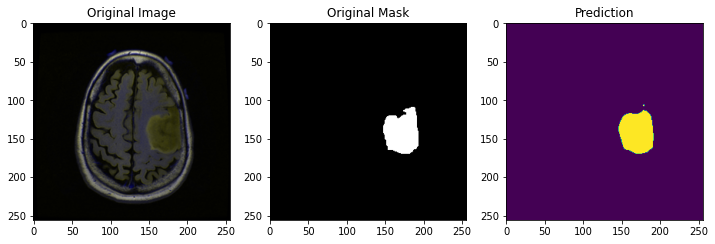

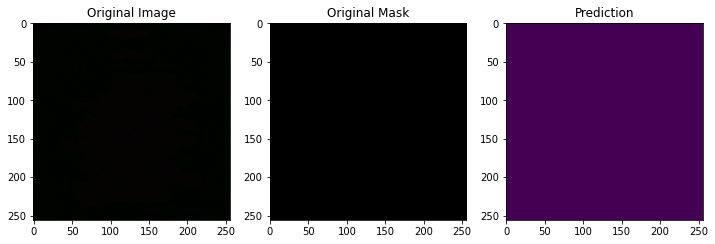

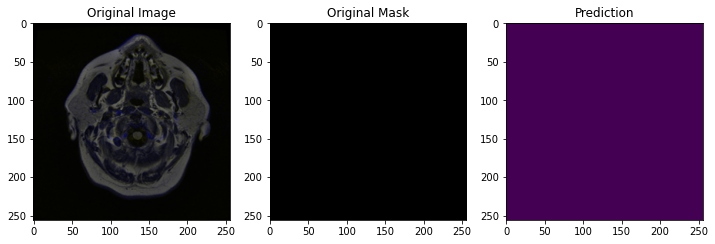

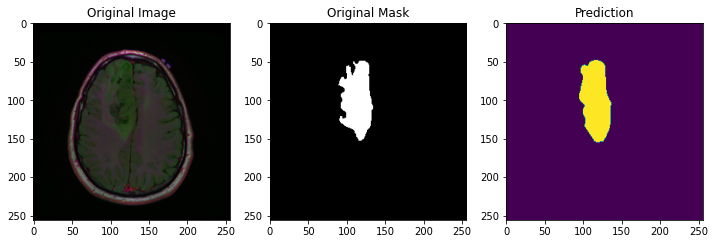

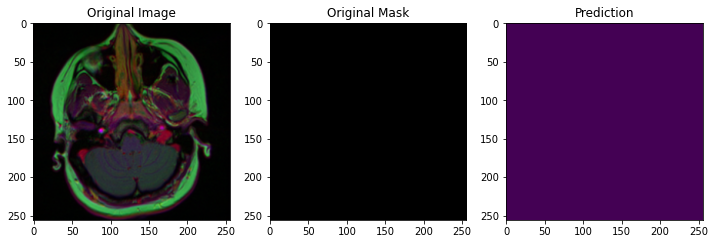

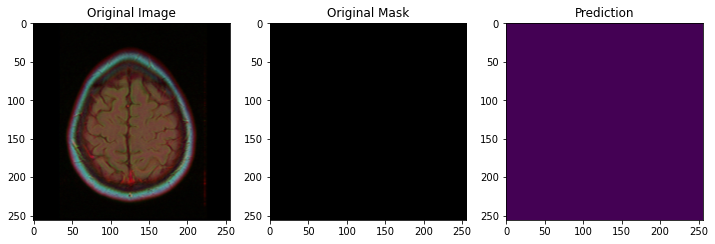

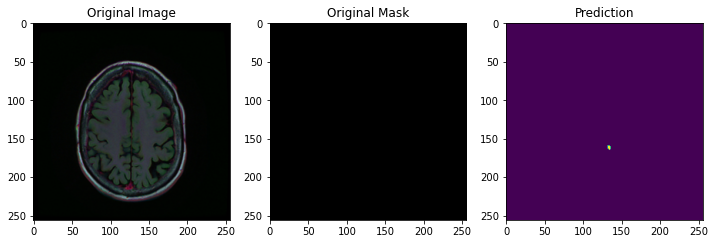

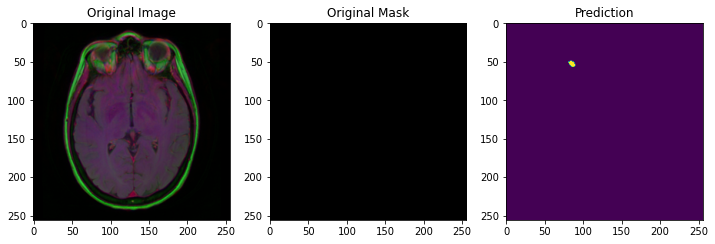

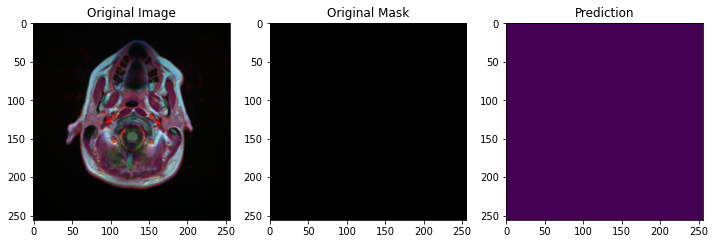

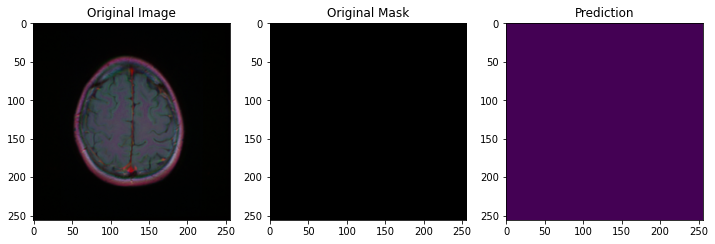

In [28]:
for i in range(30):
    index=np.random.randint(1,len(X_test.index))
    img = cv2.imread(X_test['image_path'].iloc[index])
    img = cv2.resize(img ,(256, 256))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(X_test['mask_path'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()

In [ ]:
# Data creation so as to pass to Custom Data Generators
X_train_img = list(X_train.image_path)
X_train_mask = list(X_train.mask_path)

X_val_img = list(X_val.image_path)
X_val_mask = list(X_val.mask_path)

In [ ]:
# We will be send the return type in .fit method
train_data = DataGenerator(X_train_img,X_train_mask)  
val_data = DataGenerator(X_val_img,X_val_mask)

In [ ]:
# Reference : https://medium.com/analytics-vidhya/write-your-own-custom-data-generator-for-tensorflow-keras-1252b64e41c3
# A very good article of Custom Data Generators
# When we need to feed multiple Inputs or get multiple outputs we need to use Custom Data Generators
# Als writing custom callbacks like on_epoch_end is possible

class DataGenerator(Sequence):
    def __init__(self,ids,mask,image_dir = './',batch_size = 16,img_h = 256,img_w = 256,shuffle = True):
        
        self.ids = ids  # Saves the Actual RGB Images Indexes
        self.mask = mask  # Saves the Mask Graysacle Images indexes
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.img_h = img_h
        self.img_w = img_w
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        # Gives the nmuber of batch we can have in every epochs
        
        return int(np.floor(len(self.ids))// self.batch_size)
    
    def __getitem__(self,index):
        # This method with the help of a helper method generates a batch of data which can then
        # be feed into the model. This is done primarily with the help of index variable and batch size variable
        
        # Here we will generate a range of indexes that we need to send as a batch
        # for example of batch size = 16 then send indexes values present in 0 to 15, 16-31,32-47 etc.
        indexes = self.indexes[index*self.batch_size:(index+1)* self.batch_size]
        
        # Since we have indexes that we need to send, now we need to extract the corresponding 
        # Image paths and mask path which can the be fed into the model
        
        image_ids_list = [self.ids[i] for i in indexes]
        mask_ids_list = [self.mask[i] for i in indexes]
        
        # Helper method to generate actual Images and its corresponding mask_images
        
        X_images,y_mask = self.helper_method(image_ids_list,mask_ids_list)
        
        return X_images,y_mask
        
    
    def helper_method(self,image_ids,mask_ids):
        
        # Create Data points that needs to be returned. Here we need to return 
        # 1.) A batch of RGB Images of size img_h * img_w
        # 2.) A batch of mask Images of size img_h * img_w
        
        X_image = np.empty((self.batch_size,self.img_h,self.img_w,3))  # RGB images of size img_h * img_w
        y_mask = np.empty((self.batch_size,self.img_h,self.img_w,1))  # Greyscale images of size img_h * img_w
        
        # Do the following
        # 1.) Iterate over the list of IDS for image and mask
        # 2.) For every id, convert into the String and pick the image from the path
        # 3.) Append the Image with correct height and width int othe dataframe
        
        for i in range(len(image_ids)):
            rgb_image_path = str(self.ids[i])
            grey_scale_image_path = str(self.mask[i])
            
            # Read the Image and mask
            image = io.imread(rgb_image_path)
            if image is None:
                print("imread failed on {}".format(rgb_image_path))
            mask = io.imread(grey_scale_image_path)
            if mask is None:
                print("imread failed on {}".format(grey_scale_image_path))
            
            # Resize the Image to (img_h * img_h) and convert it to float
            image = cv2.resize(image,(self.img_h,self.img_w))
            image = np.array(image,dtype = np.float64)
            
            mask = cv2.resize(mask,(self.img_h,self.img_w))
            mask = np.array(mask,dtype = np.float64)
            
            # Standardize
            image -= image.mean()
            image /= image.std()
            
            mask -= mask.mean()
            mask /= mask.std()
            
            # Append the above Image and Mask to X and Y
            X_image[i,] = image
            
            y_mask[i,] = np.expand_dims(mask,axis = 2) # Convert Greyscale from 2d to 3d example (256,256) to (256,256,1)
        
        y_mask = (y_mask > 0).astype(int)  # Normalizing
        
        return X_image,y_mask
    
    def on_epoch_end(self):
        # Do something here after every epoch end
        
        #getting the array of indices based on the input dataframe, This will generate a list like 0,1,2,3 ....Input length - 1
        self.indexes = np.arange(len(self.ids))
        
        if self.shuffle:
            np.random.shuffle(self.indexes)
        

In [ ]:
# Now we need to have custom Implementation of the Tversky and Focal Tversly loss
# Reference : https://github.com/nabsabraham/focal-tversky-unet/blob/master/losses.py

from keras.losses import binary_crossentropy
import keras.backend as K

epsilon = 1e-5
smooth = 1

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def focal_tversky(y_true,y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)